In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
dataset_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
dataset_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = dataset_train.iloc[:,1:].values
y_train = dataset_train.iloc[:,0].values
X_test = dataset_test.iloc[:,:].values


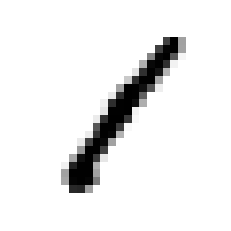

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=plt.cm.binary)
plt.axis("off")
plt.show()

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [7]:
rnd_clf = RandomForestClassifier(n_estimators=300,max_depth=30)

In [8]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, n_estimators=300)

In [9]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_train,rnd_clf.predict(X_train))
score

1.0

In [10]:
predictions  = rnd_clf.predict(X_test)
output = pd.DataFrame({"ImageID":dataset_test.index+1,"Label":predictions})
output.to_csv("my_submission.csv",index=False)
print("Your submission has been done succesfully")

Your submission has been done succesfully
